# **Sentimentent Analysis and Modeling On Amazon Customer Reviews with 80 % Accuracy**

# **Importing Libraries**

In [15]:
# First import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
import warnings
warnings.filterwarnings('ignore')

# **Exploring Dataset**

In [17]:
df=pd.read_csv('Reviews.csv')

In [18]:

df2=df.copy()
df.head(1000)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [19]:
# Know number of columns and rows
df.shape

(568454, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [21]:
df['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

**Observation:**
> I will remove all unnecessary columns and keep only 2 column which I really care about `Text`,`Score`
to perform sentiment analysis

In [22]:
df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessDenominator','HelpfulnessNumerator','Time',
        'Summary'],axis=1,inplace=True)


In [23]:
# to ensure that there are only 2 columns
df.columns

Index(['Score', 'Text'], dtype='object')

In [24]:
# to check for null values after in Text and Score column
df.isna().sum()

Score    0
Text     0
dtype: int64

In [25]:
# To check for duplicates
df.duplicated().sum()

174779

# **Observation**:
There aren't null values but there are `174779` duplicated row ,So I will remove it from dataset

In [26]:
df.drop_duplicates(inplace=True)


In [27]:
df.shape

(393675, 2)

**The number of rows in dataset after removing duplicates has transformed from `568454` to `393675`.**

# **Exploring Target Column `Score`**

In [28]:
# Show number of unique values in score column
df['Score'].nunique()

5

In [29]:
# Show unique values in score column
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

# **Distribution of Ratings in `Score` Column**

In [30]:
# Show value distibution of score ratings
df['Score'].value_counts()/len(df)*100

Score
5    63.693402
4    14.243729
1     9.215724
3     7.562583
2     5.284562
Name: count, dtype: float64

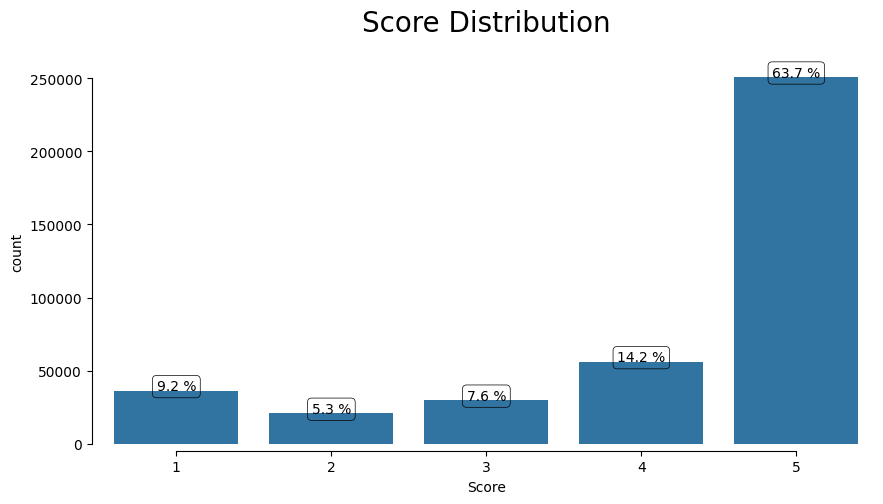

In [31]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Score'])
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

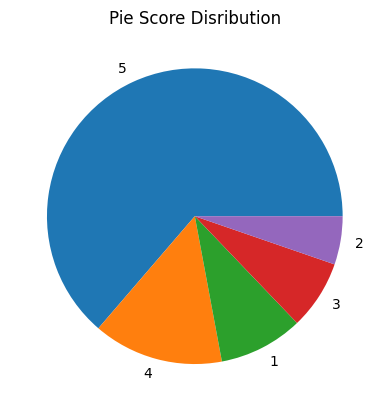

In [32]:
score_values=df['Score'].value_counts()
plt.pie(score_values,labels=score_values.index)
plt.title('Pie Score Disribution')
plt.show()

# **Observation**:
> We notice that `63.5 %` of reviews have the highest score ratings which indicate that high percentage of product reviews are positive.
>> The Distribution of score values isn't balanced at all.

# **Taking Samples from `Score` Column**

In [33]:
new_df= df.groupby('Score').apply(lambda x: x.sample(10000)).reset_index(drop=True)

In [34]:
new_df

,Score,Text
0,1,"She wasnt very impressed by them, even asked m..."
1,1,can't find this product in stores anymore. su...
2,1,I wanted to try making red curry at home since...
3,1,"Day:1 Hmm, I was excited on seeing Amzn.com's ..."
4,1,I wouldn't reccomend this product due to the f...
...,...,...
49995,5,I ordered these lollipops to go on top of a ca...
49996,5,Any good cook will tell you that by adding a s...
49997,5,THESE ARE AMAZING!!! Be cautioned because they...
49998,5,Use to pick up at the market but couldn't fin....


In [35]:
new_df.shape

(50000, 2)

**By taking from each score 20000 sample, We will have 100000 Row and by this data became balanced.**

# **To Ensure Score Distribution After Sampling**

In [36]:
new_df['Score'].value_counts()

Score
1    10000
2    10000
3    10000
4    10000
5    10000
Name: count, dtype: int64

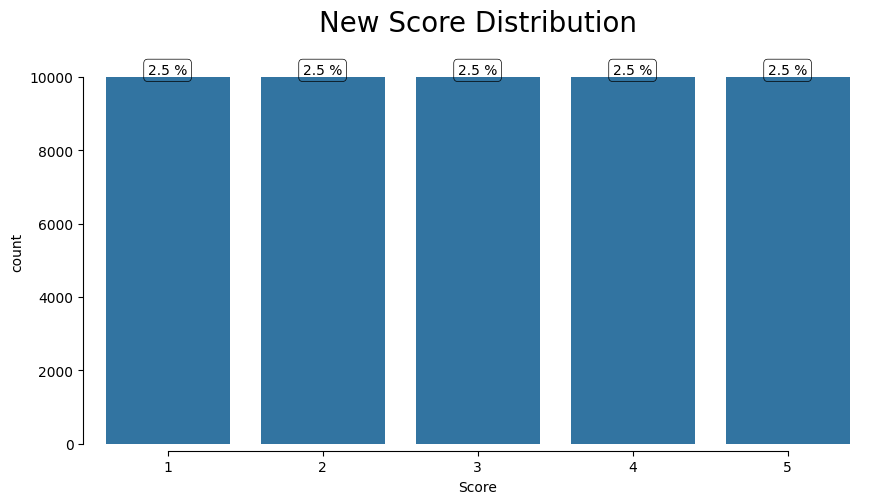

In [37]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=new_df['Score'])
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('New Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

**As shown,`Score` Column is balanced and each value have the same distribution so the model won't be biased to specific value.**

# **Text Preprocessing**

In [38]:
# import libraies for preprocessing
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1007)>


False

In [40]:
stop_words=set(stopwords.words('english'))
#lemmatization=WordNetLemmatizer()
stemming=PorterStemmer()

In [41]:
'''import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')'''

"import nltk\nnltk.download('wordnet')\nnltk.download('punkt')\nnltk.download('omw-1.4')"

In [42]:
def clean_text(text):
    # 1. Convert to lower
    txt=text.lower()

    # 1. split to words
    tokens=word_tokenize(text)

    # 3. remove punctuation
    tokens=[word for word in tokens if word not in string.punctuation]

    # 4. Remove stopwords
    tokens=[word for word in tokens if word not in stop_words]

    # 5. Remove numbers
    tokens=[word for word in tokens if not word.isdigit()]

    # 6. Apply Stemming
    tokens=[stemming.stem(word) for word in tokens]

    # To return these single words back into one string
    return ' '.join(tokens)


In [43]:
new_df['cleaned_text'] = new_df['Text'].apply(clean_text)

In [44]:
new_df

,Score,Text,cleaned_text
0,1,"She wasnt very impressed by them, even asked m...",she wasnt impress even ask much pay so tell he...
1,1,can't find this product in stores anymore. su...,ca n't find product store anymor sure glad fou...
2,1,I wanted to try making red curry at home since...,i want tri make red curri home sinc 's delici ...
3,1,"Day:1 Hmm, I was excited on seeing Amzn.com's ...",day:1 hmm i excit see amzn.com 's offer pretti...
4,1,I wouldn't reccomend this product due to the f...,i would n't reccomend product due fact paper s...
...,...,...,...
49995,5,I ordered these lollipops to go on top of a ca...,i order lollipop go top cake babi shower the c...
49996,5,Any good cook will tell you that by adding a s...,ani good cook tell ad smoke product dish add v...
49997,5,THESE ARE AMAZING!!! Be cautioned because they...,these are amaz be caution hard stop eat i foun...
49998,5,Use to pick up at the market but couldn't fin....,use pick market could n't fin order line quick...


# **Show most frequent words in text after preprocessing**

In [45]:
!pip install wordcloud

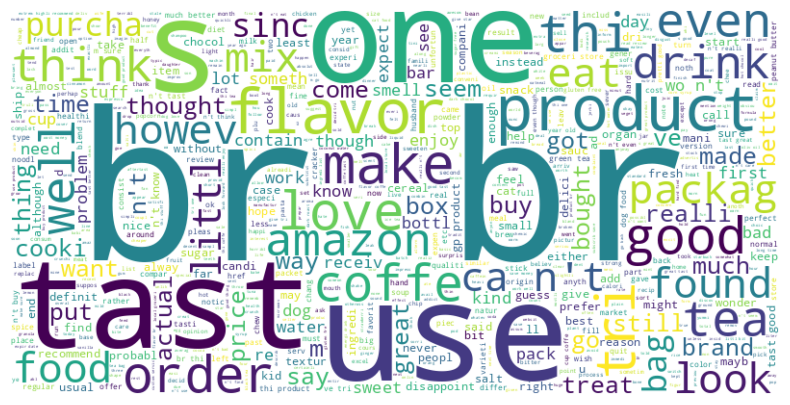

In [46]:
from wordcloud import WordCloud
# Combine all cleaned text into a single string
all_text=' '.join(new_df['cleaned_text'])



# Create the WordCloud object with the top 1000 words
wordcloud = WordCloud(width=800, height=400, max_words=1000, background_color='white').generate(all_text)

# Plot the WordCloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [47]:
len(set(all_text))

72

In [48]:
len(all_text)

14495283

# **Vectorizing Text to numbers before Modeling**

In [49]:
#pip install gensim

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForest
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



# **Spliting Data**

>Decided to Classify 5 scores into only 2 Scores: `Positive` and `Negative`,as when applying on 5 scores which was indicating `very bad`,`bad`,`good`,`very good`,`excellent` , the highest accuracy was `47.9` with `Logistic Regression`.
>>Apply Binary Classification on Reviews : `1` --> `Positive` , `0` --> `Negative`.

In [51]:
new_df['Score'] = new_df['Score'].apply(lambda x: 1 if x >=3 else 0)
# 1 --> Good 
#0 --> Bad

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X=new_df['cleaned_text']
y=new_df['Score']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.20)


# **Modeling Using ML Models**

# **1. Logistic Regression**

In [55]:
logistic_pipe=Pipeline(
    [
      ('vec',CountVectorizer(stop_words= "english")),
        ('Tf_idf',TfidfTransformer()),
        ('log_rg',LogisticRegression()),

    ]
)


In [56]:
log_fit = logistic_pipe.fit(X_train,y_train)


In [57]:
log_pred=logistic_pipe.predict(X_test)

In [58]:
print('Training accuracy:', log_fit.score(X_train,y_train))
print('Test accuracy:', log_fit.score(X_test,y_test))

Training accuracy: 0.829175
Test accuracy: 0.7897


<Axes: >

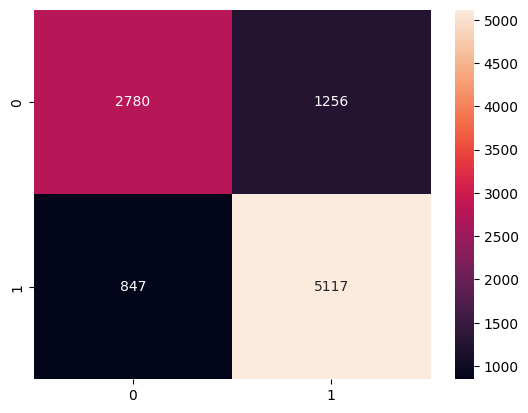

In [59]:
sns.heatmap(confusion_matrix(y_test,log_pred), annot=True, fmt="d")

**Making Predicion using Logistic Regression**

In [60]:
reviews=['This is an amazing product,I will definetly buy it ',
         'very bad,I dont recommend it at all',
'we received this coffee yesterday, and have to say its amazing',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']
prediction=logistic_pipe.predict(reviews)
sentiment=["Positive" if i == 1 else "Negative" for i in prediction]
# Predicted : P,N,P,N,P    2 errors
print(sentiment)

['Negative', 'Negative', 'Positive', 'Negative', 'Positive']


# **2. Naive Bayes**

              precision    recall  f1-score   support

           0     0.8340    0.3647    0.5075      4036
           1     0.6886    0.9509    0.7988      5964

    accuracy                         0.7143     10000
   macro avg     0.7613    0.6578    0.6531     10000
weighted avg     0.7473    0.7143    0.6812     10000



<Axes: >

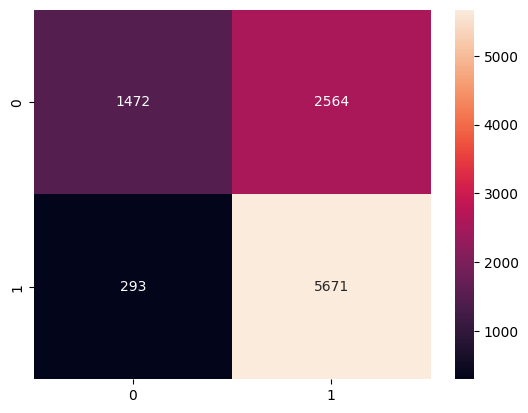

In [61]:
naive_bayes_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

# Train the model
nb_model = naive_bayes_pipeline.fit(X_train, y_train)
y_pred_nb = naive_bayes_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_nb,digits=4))
sns.heatmap(confusion_matrix(y_test,y_pred_nb), annot=True, fmt="d")

In [62]:
print('Training accuracy of Navie Bayes : ', nb_model.score(X_train,y_train))
print('Test accuracy of Navie Bayes : ', nb_model.score(X_test,y_test))

Training accuracy of Navie Bayes :  0.75825
Test accuracy of Navie Bayes :  0.7143


# **3. SVC**

In [ ]:
svm_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])

# Train the model
svc = svm_pipeline.fit(X_train, y_train)
y_pred_svc = svm_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_svc,digits=4))


<Axes: >

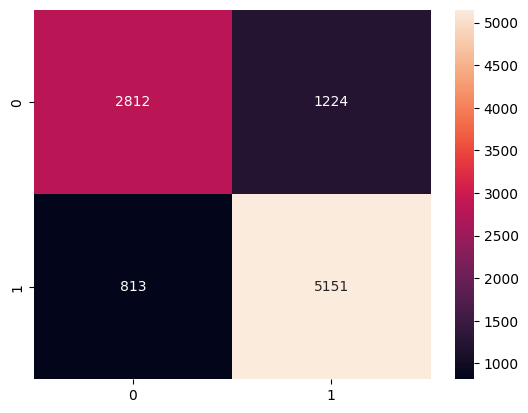

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot=True, fmt="d")

In [ ]:
print('Training accuracy of SVC : ', svc.score(X_train,y_train))
print('Test accuracy of SVC : ', svc.score(X_test,y_test))

Training accuracy of SVC :  0.9558
Test accuracy of SVC :  0.7963


**Making Prediction using SVC**

In [ ]:
reviews=['This is an amazing product,I will definetly buy it ',
         'very bad,I dont recommend it at all',
'we received this coffee yesterday, and have to say its amazing',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']
prediction=svm_pipeline.predict(reviews)
sentiment=["Positive" if i == 1 else "Negative" for i in prediction]
# Predicted : P,N,P,N,P   # only 1 error   
print(sentiment)

['Positive', 'Negative', 'Negative', 'Negative', 'Positive']


# **Modeling Using Recurrent Neural Network Models `RNN`**

# **LSTM**

# **Apply LSTM on Text column only**

In [ ]:
new_df['Score']

0        0
1        0
2        0
3        0
4        0
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: Score, Length: 50000, dtype: int64

In [ ]:
new_df['Text']

0        The wheat free brownie mix is not to my liking...
1        saltyness may be the "norm" for products like ...
2        I purchased this product from Otto's because t...
3        Switch to this food and my dog became very sic...
4        please do not take this note as an attack on y...
                               ...                        
49995    I bought this for Halloween and I had SOOOOOO ...
49996    My two cockers love this formula of chicken an...
49997    Ive hunted high and low and have tried every t...
49998    We have a rapidly growing 7 month Labradoodle ...
49999    we received this coffee yesterday, and have to...
Name: Text, Length: 50000, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import regularizers

In [ ]:
reviews=new_df['Text'].values
sentiments=new_df['Score'].values

# Apply tokenization
tokenizer=Tokenizer(num_words=20000)
tokenizer.fit_on_texts(reviews)
sequences=tokenizer.texts_to_sequences(reviews)

# Padding sequences on reviews to have same length
max_len = 150  # Adjusted max length as reviews are longer
# X as input
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numpy array
y = np.array(sentiments)



In [ ]:
# check reviews
print(reviews)

["The wheat free brownie mix is not to my liking.  I won't be reordering. I'd rather not eat chocolate than to eat these brownies."
 'saltyness may be the "norm" for products like this, but it doesnt mean i have to like it. its probably healthier than a "slim-jim", but i still wont order again because it contains lots of milligrams of unhealthy salt, and it tastes extremely salty. better have a gallon of water nearby to go with it,if you want to try eating these.i hope they can try making a lower sodium version of this some day..'
 "I purchased this product from Otto's because the offering via Amazon Prime was out of stock.  Otto's shipped me four plain tubs without Terrafina labels and sealed with a vertical X of clear packing tape rather than Terrafina's vacuum seal where the tub and the cover meet.  I called Otto's within a few days of receipt and they said they buy in bulk from Terrafina and package it themselves.  They said they were out of Terrafina labels!  Two of the tubs devel

In [ ]:
# Check seuences hat icludes indices
print(sequences[:5])

[[1, 516, 153, 2132, 155, 8, 15, 5, 16, 1693, 2, 275, 27, 5218, 241, 366, 15, 106, 96, 53, 5, 106, 28, 1961], [204, 27, 1, 5661, 12, 184, 23, 9, 14, 6, 2613, 864, 2, 20, 5, 23, 6, 173, 237, 861, 53, 3, 2643, 4624, 14, 2, 118, 2104, 140, 97, 71, 6, 503, 738, 7, 7204, 7, 2419, 238, 4, 6, 127, 708, 498, 84, 20, 3, 1896, 7, 99, 3704, 5, 147, 18, 6, 32, 19, 148, 5, 92, 233, 28, 2, 633, 24, 49, 92, 371, 3, 854, 509, 464, 7, 9, 60, 181], [2, 229, 9, 31, 40, 15193, 71, 1, 1941, 1526, 74, 1356, 17, 54, 7, 900, 15193, 695, 47, 547, 578, 4222, 219, 15194, 2248, 4, 943, 18, 3, 10014, 2249, 7, 742, 1465, 2444, 366, 53, 2463, 1295, 332, 1, 2263, 4, 1, 1506, 2829, 2, 628, 15193, 765, 3, 178, 360, 7, 3859, 4, 24, 255, 24, 80, 11, 809, 40, 15194, 4, 188, 6, 1161, 24, 255, 24, 59, 54, 7, 15194, 2248, 125, 7, 1, 4222, 2431, 2026, 765, 3, 178, 360, 7, 16, 773, 5, 15193, 4, 2, 44, 5, 749, 41, 7, 33, 54, 2, 90, 110, 4276, 3, 956, 40, 74], [892, 5, 9, 72, 4, 16, 124, 1474, 38, 971, 147, 609, 4, 9, 124, 72, 4

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define LSTM Parameters
voca_size=20000  # as input
embedding_size=200  # as output

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=voca_size,output_dim=embedding_size,input_length=max_len))
model.add(LSTM(256,recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [ ]:
# Compile the model
import tensorflow as tf
#op=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model_checkpoint = ModelCheckpoint(
    'best_model1.keras',  # File path where the model will be saved
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the model with the best validation loss
    mode='min',  # 'min' because lower loss is better
    verbose=1  # Verbosity mode
)

# Train the LSTM model
history1=model.fit(X_train, y_train, 
          epochs=12, 
          batch_size=128, 
          validation_data=(X_test, y_test)
          , callbacks=[early_stopping,model_checkpoint])

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.6835 - loss: 0.5941
Epoch 1: val_loss improved from inf to 0.47699, saving model to best_model1.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 208ms/step - accuracy: 0.6836 - loss: 0.5939 - val_accuracy: 0.7785 - val_loss: 0.4770
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8099 - loss: 0.4381
Epoch 2: val_loss did not improve from 0.47699
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 208ms/step - accuracy: 0.8098 - loss: 0.4381 - val_accuracy: 0.7839 - val_loss: 0.4914
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8396 - loss: 0.3860
Epoch 3: val_loss did not improve from 0.47699
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 208ms/step - accuracy: 0.8396 - loss: 0.3861 - val_accuracy: 0.7826 - val_loss: 0.4777
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.8522 - loss: 0.3532
Epoch 4: val_loss did not improve from 0.47699
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 209ms/step - accuracy: 0.8522 - 

**Show Trainning and Validation Accuracy**

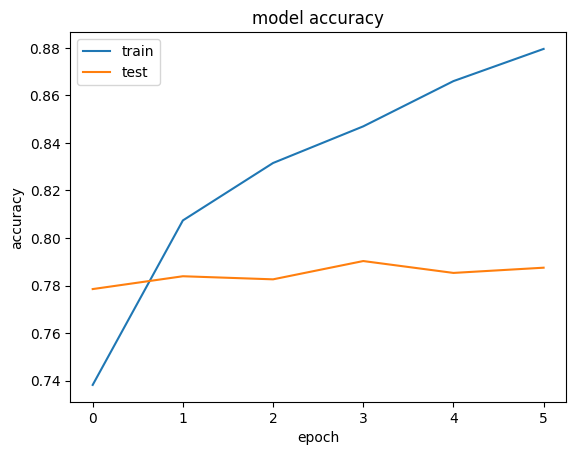

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Show Trainning and Validation Loss**

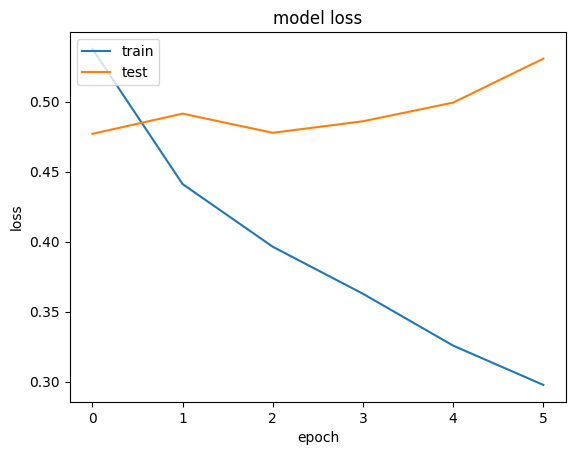

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the final accuracy
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.7889 - loss: 0.5200
Final Test Accuracy: 78.75%


# **Apply  LSTM on Text and Summary Column after Combinning them into 1 `New_Text` column**

In [ ]:
new_df['New_Text']=df['Summary']+' '+new_df['Text']
new_df['New_Text']

0        Good Quality Dog Food The wheat free brownie m...
1        Not as Advertised saltyness may be the "norm" ...
2        "Delight" says it all I purchased this product...
3        Cough Medicine Switch to this food and my dog ...
4        Great taffy please do not take this note as an...
                               ...                        
49995    Grown to really like them I bought this for Ha...
49996    Healthy Snack at a great price! My two cockers...
49997    Raw Revolution Hazelnut Cashew Ive hunted high...
49998    fantastic, but chew carefully We have a rapidl...
49999    Very Tasty and Healthy. we received this coffe...
Name: New_Text, Length: 50000, dtype: object

In [ ]:

# Convert all entries to string and replace NaNs with empty stringsreviews2=new_df['New_Text'].values
reviews2 = new_df['Text'].astype(str).fillna('')  
sentiments2=new_df['Score'].values

# Apply tokenization
tokenizer=Tokenizer(num_words=20000)
tokenizer.fit_on_texts(reviews2)
sequences=tokenizer.texts_to_sequences(reviews2)

# Padding sequences on reviews to have same length
max_len = 150  # Adjusted max length as reviews are longer
# X as input
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numpy array
y = np.array(sentiments2)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM Parameters
voca_size=20000  # as input
embedding_size=200  # as output

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=voca_size,output_dim=embedding_size,input_length=max_len))
model.add(LSTM(256,recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [ ]:
# Compile the model
import tensorflow as tf
op=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=op, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model_checkpoint = ModelCheckpoint(
    'best_model2.keras',  # File path where the model will be saved
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the model with the best validation loss
    mode='min',  # 'min' because lower loss is better
    verbose=1  # Verbosity mode
)

# Train the LSTM model
history2=model.fit(X_train, y_train, 
          epochs=12, 
          batch_size=128, 
          validation_data=(X_test, y_test)
          , callbacks=[early_stopping,model_checkpoint])

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.6779 - loss: 0.6058
Epoch 1: val_loss improved from inf to 0.48731, saving model to best_model2.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 218ms/step - accuracy: 0.6780 - loss: 0.6057 - val_accuracy: 0.7756 - val_loss: 0.4873
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.8035 - loss: 0.4463
Epoch 2: val_loss improved from 0.48731 to 0.47425, saving model to best_model2.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 215ms/step - accuracy: 0.8035 - loss: 0.4463 - val_accuracy: 0.7836 - val_loss: 0.4743
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.8338 - loss: 0.3918
Epoch 3: val_loss improved from 0.47425 to 0.46409, saving model to best_model2.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 219ms/step - accuracy: 0.8338 - loss: 0.3918 - val_accuracy: 0.7858 - val_loss: 0.4641
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.8558 - loss: 0.3515
Epoch 4: val_loss did not improve 

**Show Trainning and Validation Accuracy**

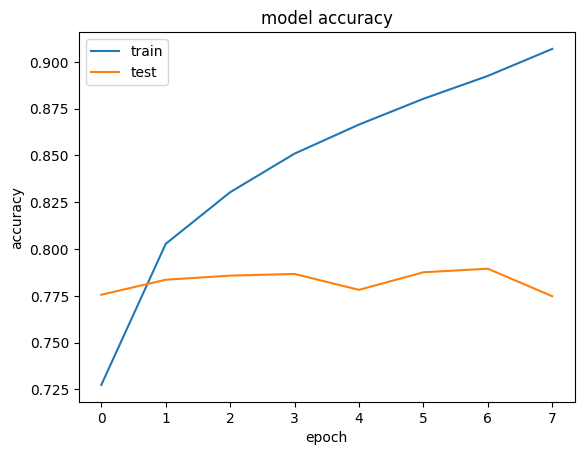

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Show Trainning and Validation Loss**

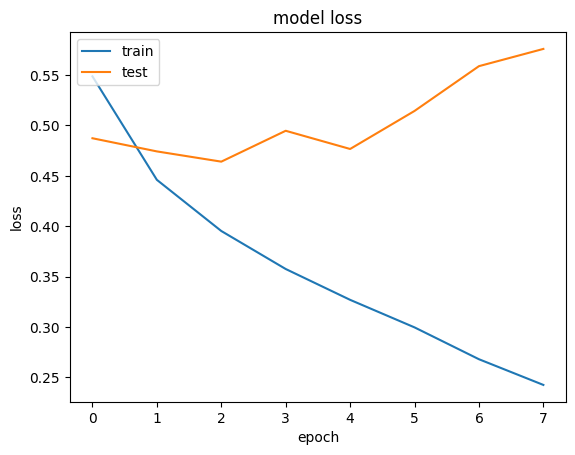

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the final accuracy
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.7769 - loss: 0.5655
Final Test Accuracy: 77.48%


# **Conclusion:**
**LSTM gives highest accuracy which is almost `80 %` with model which operates only on the `Text` Column**